In [1]:
import finesse
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

from finesse.simulations.dense import DenseSimulation
from finesse.simulations.KLU import KLUSimulation
from finesse.simulations.operator import OperatorSimulation

import finesse.utilities.operators.graph_funs as gf

from finesse.utilities.operators.abstract_operators import OperatorMatrix
from finesse.utilities.operators.optical_operators import PlanewaveOperator

%load_ext memory_profiler
%load_ext line_profiler

# Reflection off of single mirror (no cavities)

In [7]:
f3_code = f'''
l laser 1 0 0 n0
s s0b 0 n0 n1
m1 M1 0.01 0 0 n1 n2
s s1 0.2 n2 n3

ad refl 0 n1
ad trans 0 n2
ad trans2 0 n3

#xaxis M1 phi lin -10 190 1000
xaxis M1 T lin 1e-9 0.3 1000
yaxis re:im
'''

In [8]:
ifo_op = finesse.parse(f3_code, finesse2=True)
model_op = ifo_op.model
model_op.M1.phi.is_tunable = True
model_op.M1.R.is_tunable = True
model_op.M1.T.is_tunable = True
op_sim = model_op.build(carrier_sim_type=OperatorSimulation)[0]

In [9]:
ifo_dense = finesse.parse(f3_code, finesse2=True)
model_dense = ifo_dense.model
model_dense.M1.phi.is_tunable = True
model_dense.M1.R.is_tunable = True
model_dense.M1.T.is_tunable = True
dense_sim = model_dense.build(carrier_sim_type=DenseSimulation)[0]

In [10]:
ifo_klu = finesse.parse(f3_code, finesse2=True)
model_klu = ifo_klu.model
model_klu.M1.phi.is_tunable = True
model_klu.M1.R.is_tunable = True
model_klu.M1.T.is_tunable = True
klu_sim = model_klu.build(carrier_sim_type=KLUSimulation)[0]

In [11]:
with op_sim:
    out_op = ifo_op.run()

In [12]:
with dense_sim:
    out_dense = ifo_dense.run()

In [13]:
with klu_sim:
    out_klu = ifo_klu.run()

## Plot

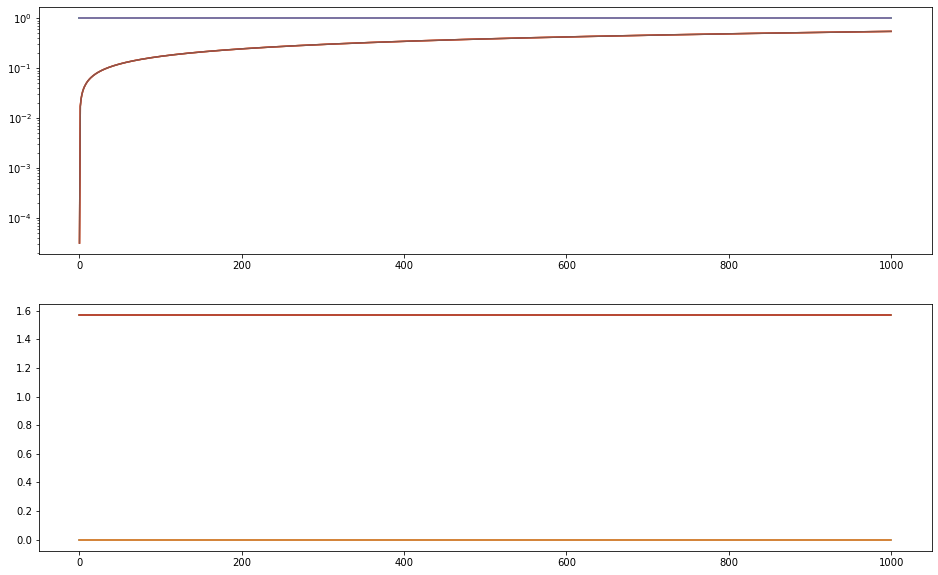

In [14]:
fig, ax = plt.subplots(2, 1, figsize=[16, 10])
ax[0].semilogy(abs(out_op['refl']))
ax[0].semilogy(abs(out_op['trans']))
ax[0].semilogy(abs(out_dense['refl']))
ax[0].semilogy(abs(out_dense['trans']))
ax[0].semilogy(abs(out_klu['refl']))
ax[0].semilogy(abs(out_klu['trans']))

ax[1].plot(np.angle(out_op['refl']))
ax[1].plot(np.angle(out_klu['refl']))
ax[1].plot(np.angle(out_op['trans']))
ax[1].plot(np.angle(out_klu['trans']))

# Single cavity

In [2]:
f3_code = f'''
l laser 1 0 0 n0
s s0b 0 n0 n1
m1 M1 0.01 0 0 n1 n2
s s1 0.2 n2 n3
m1 M2 0.001 0 0 n3 n4

ad refl 0 n1
ad circ 0 n2
ad trans 0 n4

xaxis M1 phi lin -10 190 1000
yaxis re:im
'''

In [3]:
ifo_op = finesse.parse(f3_code, finesse2=True)
model_op = ifo_op.model
model_op.M1.phi.is_tunable = True
model_op.M1.R.is_tunable = True
model_op.M1.T.is_tunable = True
op_sim = model_op.build(carrier_sim_type=OperatorSimulation)[0]

with op_sim:
    out_op = ifo_op.run()

In [4]:
ifo_klu = finesse.parse(f3_code, finesse2=True)
model_klu = ifo_klu.model
model_klu.M1.phi.is_tunable = True
model_klu.M1.R.is_tunable = True
model_klu.M1.T.is_tunable = True
klu_sim = model_klu.build(carrier_sim_type=KLUSimulation)[0]

with klu_sim:
    out_klu = ifo_klu.run()

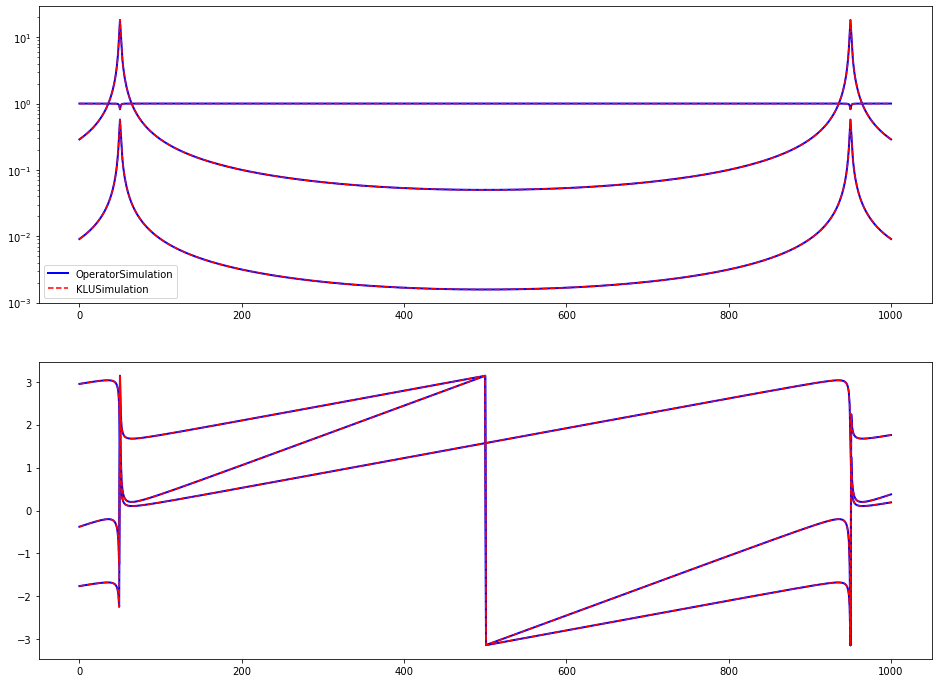

In [5]:
fig, ax = plt.subplots(2, 1, figsize=[16, 12])
ax[0].semilogy(abs(out_op['refl']) ,c='b',lw=2,label='OperatorSimulation')
ax[0].semilogy(abs(out_op['circ']) ,c='b',lw=2)
ax[0].semilogy(abs(out_op['trans']),c='b',lw=2)
ax[0].semilogy(abs(out_klu['refl']) ,c='r',lw=1.5,ls='--',label='KLUSimulation')
ax[0].semilogy(abs(out_klu['circ']) ,c='r',lw=1.5,ls='--')
ax[0].semilogy(abs(out_klu['trans']),c='r',lw=1.5,ls='--')

ax[0].legend()

ax[1].plot(np.angle(out_op['refl']) ,c='b',lw=2)
ax[1].plot(np.angle(out_op['circ']) ,c='b',lw=2)
ax[1].plot(np.angle(out_op['trans']),c='b',lw=2)
ax[1].plot(np.angle(out_klu['refl']) ,c='r',lw=1.5,ls='--')
ax[1].plot(np.angle(out_klu['circ']) ,c='r',lw=1.5,ls='--')
ax[1].plot(np.angle(out_klu['trans']),c='r',lw=1.5,ls='--')

# Coupled cavity

In [2]:
f3_code = f'''
l laser 1 0 0 n0
s s0b 0 n0 n1
m1 M1 0.01 0 0 n1 n2
s s1 0.2 n2 n3
m1 M2 0.01 0 0 n3 n4
s s2 0.2 n4 n5
m1 M3 0.001 0 0 n5 n6

ad refl 0 n1
ad circ 0 n2
ad circ2 0 n4
ad trans 0 n6

xaxis M1 phi lin -10 190 1000
yaxis re:im
'''

In [3]:
ifo_op = finesse.parse(f3_code, finesse2=True)
model_op = ifo_op.model
model_op.M1.phi.is_tunable = True
# model_op.M1.R.is_tunable = True
# model_op.M1.T.is_tunable = True
op_sim = model_op.build(carrier_sim_type=OperatorSimulation)[0]
op_sim.align_nodes = ['M1.p1.o', 'M2.p2.o']

In [4]:
# %%prun

with op_sim:
    %lprun -f PlanewaveOperator.build out_op = ifo_op.run()
#     out_op = ifo_op.run()

In [5]:
ifo_klu = finesse.parse(f3_code, finesse2=True)
model_klu = ifo_klu.model
model_klu.M1.phi.is_tunable = True
model_klu.M1.R.is_tunable = True
model_klu.M1.T.is_tunable = True
klu_sim = model_klu.build(carrier_sim_type=KLUSimulation)[0]

In [6]:
with klu_sim:
    out_klu = ifo_klu.run()

In [7]:
fig, ax = plt.subplots(2, 1, figsize=[16, 12])
ax[0].semilogy(abs(out_op['refl']) ,c='b',lw=2,label='OperatorSimulation')
ax[0].semilogy(abs(out_op['circ']) ,c='b',lw=2)
ax[0].semilogy(abs(out_op['circ2']),c='b',lw=2)
ax[0].semilogy(abs(out_op['trans']),c='b',lw=2)
ax[0].semilogy(abs(out_klu['refl']) ,c='r',lw=1.5,ls='--',label='KLUSimulation')
ax[0].semilogy(abs(out_klu['circ']) ,c='r',lw=1.5,ls='--')
ax[0].semilogy(abs(out_klu['circ2']),c='r',lw=1.5,ls='--')
ax[0].semilogy(abs(out_klu['trans']),c='r',lw=1.5,ls='--')

ax[0].legend()

ax[1].plot(np.angle(out_op['refl']) ,c='b',lw=2)
ax[1].plot(np.angle(out_op['circ']) ,c='b',lw=2)
ax[1].plot(np.angle(out_op['circ2']),c='b',lw=2)
ax[1].plot(np.angle(out_op['trans']),c='b',lw=2)
ax[1].plot(np.angle(out_klu['refl']) ,c='r',lw=1.5,ls='--')
ax[1].plot(np.angle(out_klu['circ']) ,c='r',lw=1.5,ls='--')
ax[1].plot(np.angle(out_klu['circ2']),c='r',lw=1.5,ls='--')
ax[1].plot(np.angle(out_klu['trans']),c='r',lw=1.5,ls='--')

# Ring Cavity

In [2]:
f3_code = f'''
l lasera 1.234 0 12.34 n0a
s s0a 0 n0a nIC1

l laserb 2.341 0 23.41 n0b
s s0b 0 n0b nICrefl

bs1 IC 0.05 0 0 0 nIC1 nICrefl nIC3 nIC4
s sIC2OC 0.1 nIC3 nOC1
bs1 OC 0.05 0 0 0 nOC1 nOC2 nout nOC4
s OC2RM 0.1 nOC2 nRM2
s IC2RM 0.1 nRM1 nIC4
bs1 RM 0.001 0 0 0 nRM1 nRM2 dump dump

ad refl 0 nICrefl
ad circ 0 nIC3
ad circ2 0 nRM2
ad trans 0 nout

xaxis RM phi lin -10 190 1000
yaxis re:im
'''

In [3]:
ifo_klu = finesse.parse(f3_code, finesse2=True)
model_klu = ifo_klu.model
model_klu.RM.phi.is_tunable = True
klu_sim = model_klu.build(carrier_sim_type=KLUSimulation)[0]

In [11]:
ifo_dense = finesse.parse(f3_code, finesse2=True)
model_dense = ifo_dense.model
model_dense.RM.phi.is_tunable = True
dense_sim = model_dense.build(carrier_sim_type=DenseSimulation)[0]

In [4]:
ifo_op = finesse.parse(f3_code, finesse2=True)
model_op = ifo_op.model
model_op.RM.phi.is_tunable = True
op_sim = model_op.build(carrier_sim_type=OperatorSimulation)[0]

In [10]:
%%time

with klu_sim:
    out_klu = ifo_klu.run()

CPU times: user 321 ms, sys: 85 µs, total: 321 ms
Wall time: 319 ms


In [12]:
%%time

with dense_sim:
    out_dense = ifo_dense.run()

CPU times: user 6.72 s, sys: 8.05 s, total: 14.8 s
Wall time: 1.28 s


In [9]:
%%time

with op_sim:
    out_op = ifo_op.run()

CPU times: user 628 ms, sys: 3.62 ms, total: 632 ms
Wall time: 631 ms


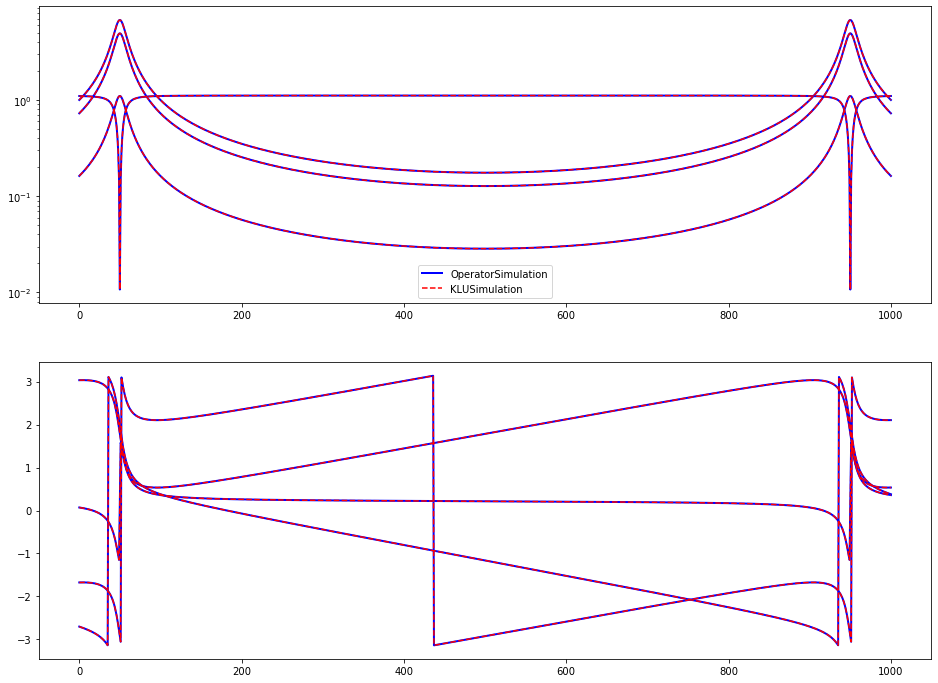

In [13]:
fig, ax = plt.subplots(2, 1, figsize=[16, 12])
ax[0].semilogy(abs(out_op['refl']) ,c='b',lw=2,label='OperatorSimulation')
ax[0].semilogy(abs(out_op['circ']) ,c='b',lw=2)
ax[0].semilogy(abs(out_op['circ2']),c='b',lw=2)
ax[0].semilogy(abs(out_op['trans']),c='b',lw=2)
ax[0].semilogy(abs(out_klu['refl']) ,c='r',lw=1.5,ls='--',label='KLUSimulation')
ax[0].semilogy(abs(out_klu['circ']) ,c='r',lw=1.5,ls='--')
ax[0].semilogy(abs(out_klu['circ2']),c='r',lw=1.5,ls='--')
ax[0].semilogy(abs(out_klu['trans']),c='r',lw=1.5,ls='--')

ax[0].legend()

ax[1].plot(np.angle(out_op['refl']) ,c='b',lw=2)
ax[1].plot(np.angle(out_op['circ']) ,c='b',lw=2)
ax[1].plot(np.angle(out_op['circ2']),c='b',lw=2)
ax[1].plot(np.angle(out_op['trans']),c='b',lw=2)
ax[1].plot(np.angle(out_klu['refl']) ,c='r',lw=1.5,ls='--')
ax[1].plot(np.angle(out_klu['circ']) ,c='r',lw=1.5,ls='--')
ax[1].plot(np.angle(out_klu['circ2']),c='r',lw=1.5,ls='--')
ax[1].plot(np.angle(out_klu['trans']),c='r',lw=1.5,ls='--')